In [42]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [39]:
stoc = yf.Ticker("HDFCBANK.NS")
hist = stoc.history(period="max")
hist = hist.reset_index()
x = hist["Date"]
for i in range(len(x)):
    x[i] = x[i].toordinal()
y = hist["Close"]
df = hist[["Date", "Close"]]
df

C:\Users\anand\AppData\Local\Temp\ipykernel_15740\2098594373.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i] = x[i].toordinal()


,Date,Close
0,728659,2.389957
1,728660,2.385947
2,728661,2.393967
3,728662,2.377928
4,728663,2.373917
...,...,...
6853,738608,1587.800049
6854,738610,1609.550049
6855,738613,1610.550049
6856,738615,1653.750000


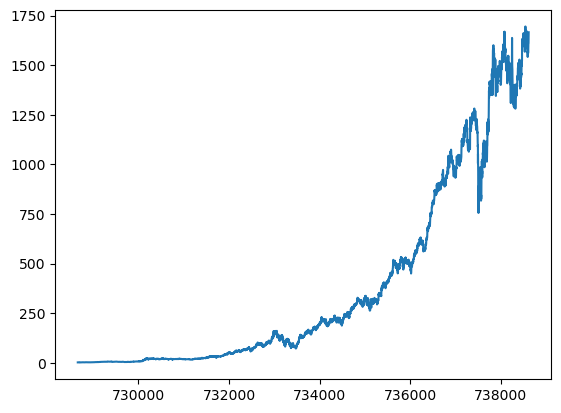

In [40]:
#just curious since its 28 years data graph lmao
plt.plot(x, y)
plt.show()

In [52]:
lg = LinearRegression()
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
lg.fit(x_train, y_train)
m = lg.coef_
c = lg.intercept_

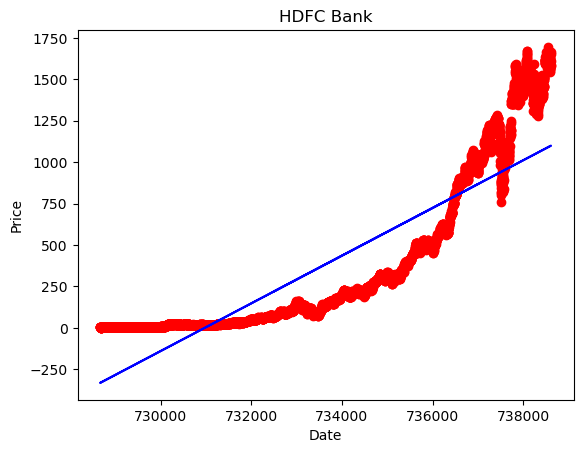

In [43]:
plt.scatter(x_train, y_train, color="red")
plt.plot(x_train, lg.predict(x_train), color="blue")
plt.title("HDFC Bank")
plt.xlabel("Date")
plt.ylabel("Price") 
plt.show()

In [54]:
# let date = 738616 
new_date = 738616
lr_price = m * new_date + c
print(lr_price)

[[1099.63148968]]


In [61]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2, include_bias=False) #include_bias is set to false because we dont want to add a constant term
x_poly = pf.fit_transform(x)
lg.fit(x_poly, y)
poly_m = lg.coef_
poly_c = lg.intercept_
poly_m, poly_c

(array([[-4.24259352e+01,  2.90139066e-05]]), array([15509418.59187465]))

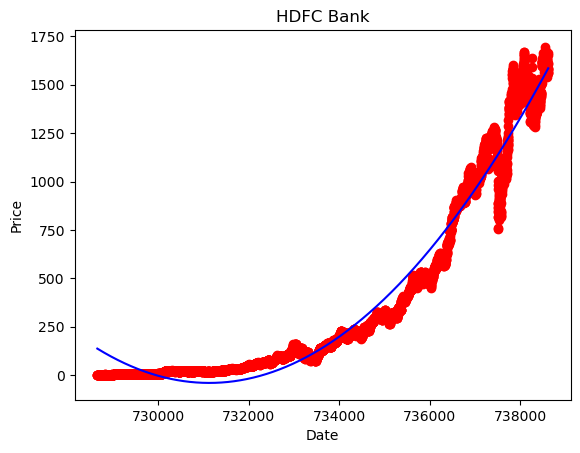

In [59]:
plt.scatter(x, y, color="red")
plt.plot(x, lg.predict(x_poly), color="blue")
plt.title("HDFC Bank")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [68]:
pr_price = poly_m[0][0] * pow(new_date, 2) + poly_m[0][1] * pow(new_date,1) + poly_c
print(pr_price)
#umm wtf why is it -e13 lol

[-2.3145606e+13]


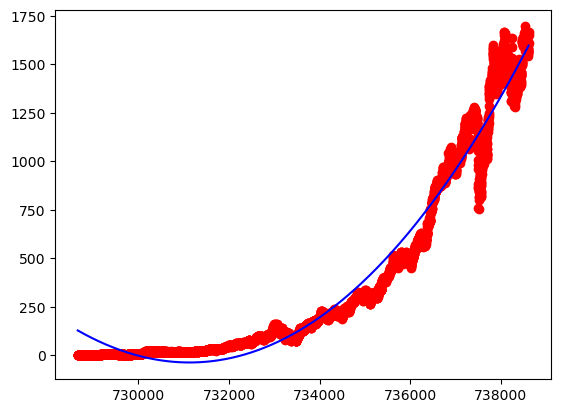

In [71]:
#trying for degree 3
pf = PolynomialFeatures(degree=10, include_bias=False)
x_poly = pf.fit_transform(x)
lg.fit(x_poly, y)
poly_m = lg.coef_
poly_c = lg.intercept_
plt.scatter(x, y, color="red")
plt.plot(x, lg.predict(x_poly), color="blue")
plt.show()
# wtf why is it same even if degree is 10 once recheck later when u understand it much better
#tooooooooooooooooooooodooooooooooooooooo